In [2]:
# EDA
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')
import string
from spacy.tokens import Doc
nltk.download('averaged_perceptron_tagger')
from nltk import tokenize # fast sentence tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import spacy #natural language processing
import en_core_web_sm
import re
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package wordnet to /Users/v/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/v/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/v/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /Users/v/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/v/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df = pd.read_excel("/content/drive/MyDrive/Data Science for PM/Diabetes Continuous Glucose Monitoring – Data Export.xlsx")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df = pd.read_excel("Diabetes Continuous Glucose Monitoring – Data Export.xlsx")
df.shape

(37844, 63)

## EDA

In this section, we conducted analysis for the following steps:
1. Inspect columns
2. Summary statistics 
3. Check missing values
4. Check outliers

__1. Columns__
1. We removed columns that only have missing values
2. We removed columns that are not informative (with too many missing values and/or too granular information)

In [5]:
df.head()

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,Domain,Sentiment,Published Date (GMT-04:00) New York,Author Gender,Author URL,Author Name,Author Handle,Author ID,Author Location - Country 1,Author Location - State/Province 1,Author Location - City 1,Author Location - Country 2,Author Location - State/Province 2,Author Location - City 2,Author Location - Other,Author Reddit Karma,Followers/Daily Unique Visitors/Subscribers,Professions,Interests,Positive Objects,Negative Objects,Richness,Tags,Quoted Post,Quoted Author Name,Quoted Author Handle,Total Engagements,Post Comments,Post Likes,Post Shares,Post Views,Post Dislikes,Reddit Score,Product Name,Product Hierarchy,Rating,@Mention Media Tags,Source Name,LexisNexis Source Publisher,LexisNexis Source Category,LexisNexis Source Genre,LexisNexis Source Quality,LexisNexis Company - High,LexisNexis Company - Any,LexisNexis Person - High,LexisNexis Person - Any,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects
0,BRDRDT2-t1_imq98sr,"My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.",NaN,Have you been denied a second/third pump? Feeling like I messed up.,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/x3dcsh/have_you_been_denied_a_secondthird_pump_feeling/imq98sr/,NaN,reddit.com,Neutrals,"Sep 1, 2022 7:41:36 PM",Unknown,https://www.reddit.com/user/itsgucciflipflopsbro,itsgucciflipflopsbro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4472,42768.0,NaN,NaN,number,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,r/diabetes_t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.,NaN,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/x2x5wr/metformin/impbcf4/,NaN,reddit.com,Positives,"Sep 1, 2022 3:53:47 PM",Unknown,https://www.reddit.com/user/Unrealgecko,Unrealgecko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5502,42760.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,r/diabetes_t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1565738759353602048,"i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom g6 and the omnipod system (and desperately trying to upgrade to the new closed loop omnipod system!)",NaN,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/1565738759353602048,NaN,twitter.com,Positives,"Sep 2, 2022 12:29:44 PM",Unknown,http://twitter.com/bromid,dimo,bromid,2156968075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,1912.0,NaN,NaN,"dexcom g6, omnipod system",NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17944607459251789,"MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carrots, apples, and macadamia nuts. Mixed it together and drizzled briannas_salad Real French Vinaigrette Dressing. When my kids see people eating alone they always say they feel bad for them. I tell them they are probably enjoying themselves. Yep, we are enjoying ourselves ??\nSIMPLE SIMPLE food! Very little insulin required, especially since I’ve been outside in the heat for hours and going back out ☀️\n\n#t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes",NaN,NaN,Instagra

In [6]:
# Removing all columns that are completely blank
df=df.dropna(axis=1, how='all')
df.shape

(37844, 39)

__2. Summary Statistics__

In [7]:
# numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Followers/Daily Unique Visitors/Subscribers,30820.0,433775.763400,3.093652e+06,1.0,21671.5,38617.0,78519.00,42298115.0
Richness,37844.0,1.903393,1.725630e+00,0.0,0.0,2.0,3.00,15.0
Total Engagements,618.0,55.522654,2.695147e+02,1.0,5.0,12.0,31.00,5782.0
Post Comments,413.0,6.237288,1.696275e+01,1.0,1.0,3.0,6.00,308.0
Post Likes,594.0,53.429293,2.700113e+02,1.0,4.0,11.0,28.75,5720.0
Rating,113.0,2.657522,1.712236e+00,1.0,1.0,2.0,5.00,5.0


In [8]:
# unique values counts
for col in df[['Source Type', 'Post Type',
       'Is Paid', 'Media Type', 'Domain', 'Sentiment','Professions', 'Interests', 
       'Richness', 'Source Name']]:
       print(df[col].value_counts())

Forums       34795
Blogs         1489
Twitter        826
Instagram      630
Comments        85
Facebook        19
Name: Source Type, dtype: int64
Replies and Comments    29892
Original                 5273
Name: Post Type, dtype: int64
No    37844
Name: Is Paid, dtype: int64
No Media              34826
Link                   1765
Image                  1065
Link; Image              86
Video                    60
Video; Image             33
Link; Video               6
Video; Link; Image        1
Link; Video; Image        1
Video; Link               1
Name: Media Type, dtype: int64
reddit.com                                         33690
twitter.com                                          826
instagram.com                                        630
forum.tudiabetes.org                                 209
community.whattoexpect.com                           146
diabetesdaily.com                                    143
apps.apple.com                                        73
community.baby

__Based on the preliminary insepction, we have the following thoughts.__

Additional columns to drop: 

1) the values are uniform across the dataset and thus the column is not informative (['Is Paid'])

2) the column may not be useful for our analysis due to too many missing values, or due to the nature of the information (['Media Type', 'Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2','Author Location - State/Province 2', 'Author Location - City 2', 'Author URL', 'Author Handle', 'Author Gender';'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'URL', 'Media Link', 'Author ID'])

Observations:

1) None of the posts in this dataset is paid

2) Source type

3) Domain (reddit most)

4) Sentiment

5) Source name (x% has diabetes-related xx)



In [9]:
# List of the columns to drop
to_drop = ['Media Type', 'Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2',
           'Author Location - State/Province 2', 'Author Location - City 2', 'Author URL', 'Author Handle', 'Author Gender',
           'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'URL', 'Media Link', 'Author ID']

In [10]:
# Drop the columns specified
df = df.drop(to_drop, axis = 1)
df.columns

Index(['Post ID', 'Sound Bite Text', 'Title', 'Source Type', 'Post Type',
       'Is Paid', 'Domain', 'Sentiment', 'Published Date (GMT-04:00) New York',
       'Author Name', 'Author Reddit Karma',
       'Followers/Daily Unique Visitors/Subscribers', 'Positive Objects',
       'Negative Objects', 'Richness', 'Total Engagements', 'Post Comments',
       'Post Likes', 'Reddit Score', 'Rating', 'Source Name'],
      dtype='object')

__3. Missing values__

In [11]:
df.isna().sum()

Post ID                                            0
Sound Bite Text                                    0
Title                                           1571
Source Type                                        0
Post Type                                       2679
Is Paid                                            0
Domain                                             0
Sentiment                                          0
Published Date (GMT-04:00) New York                0
Author Name                                      955
Author Reddit Karma                                0
Followers/Daily Unique Visitors/Subscribers     7024
Positive Objects                               29039
Negative Objects                               33297
Richness                                           0
Total Engagements                              37226
Post Comments                                  37431
Post Likes                                     37250
Reddit Score                                  

__4. Distribution and Outliers__

In [12]:
# Continuous features
# Function to detect outlier values that are outside given standard deviations
def std_outlier_test(df, threshold=3):
    std = np.std(df)
    mean = np.mean(df)
    lb, ub = (-threshold*std+mean, threshold*std+mean)
    mask = (df<lb) | (df>ub)
    print("The outlier thresholds are: %f, %f" % (lb, ub))
    print("The number of outliers is: %d" % len(df[mask]))
    return lb, ub, df[mask]

# Define function to plot distribution and identify outliers
def plot_outlier_test(df, col, threshold = 3):
    # 3 standard deviations away from mean
    lb, ub, outliers = std_outlier_test(df[col], threshold)
    #lb, ub, outliers = iqr_outlier_test(df, col, 3)

    fig, ax = plt.subplots(1,2, figsize = (10, 4))
    sns.histplot(data = df, x = col, bins = 20, ax = ax[0])
    sns.boxplot(data = df, x = col, ax = ax[1])
    plt.axvline(x = lb, color = 'red', linestyle = '--')
    plt.axvline(x = ub, color = 'red', linestyle = '--')
    plt.title('Distribution of %s' % col)
    plt.show()
    return outliers

In [13]:
# Categorical features

# Define function to print value counts and count plot
def plot_categories(df, col):
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))

    sns.countplot(x=df[col])
    plt.title('Distribution of %s' % col)
    plt.show()
    return

In [14]:
pd.to_datetime(df['Published Date (GMT-04:00) New York'])

0       2022-09-01 19:41:36
1       2022-09-01 15:53:47
2       2022-09-02 12:29:44
3       2022-09-01 14:20:21
4       2022-09-01 19:35:52
5       2022-08-31 18:59:06
6       2022-09-01 20:46:59
7       2022-09-02 03:50:23
8       2022-09-01 18:06:24
9       2022-09-01 15:49:55
10      2022-09-02 01:36:36
11      2022-09-01 21:14:01
12      2022-09-01 21:25:14
13      2022-09-02 13:06:09
14      2022-09-01 15:35:23
15      2022-09-01 14:12:29
16      2022-09-02 11:14:42
17      2022-09-02 13:16:59
18      2022-09-01 18:11:52
19      2022-09-01 15:44:12
20      2022-09-02 13:11:16
21      2022-09-01 23:18:17
22      2022-09-01 19:36:40
23      2022-09-02 09:56:43
24      2022-09-02 11:54:10
25      2022-09-01 14:27:17
26      2022-09-01 15:32:12
27      2022-09-01 17:19:52
28      2022-09-01 20:30:22
29      2022-09-02 13:00:25
30      2022-09-01 22:34:00
31      2022-09-02 10:34:22
32      2022-09-02 12:27:30
33      2022-09-02 10:07:14
34      2022-09-02 12:45:47
35      2022-09-01 1

In [15]:
# Date features

# Define function to plot count by distribution
def plot_dates(df, col):
  df[col] = pd.to_datetime(df[col])
  df['Month'] = df[col].map(lambda dt: dt.strftime('%Y-%m'))
  grouped_df = df.groupby('Month').size().to_frame("count").reset_index()
  grouped_df.plot(kind='bar', x='Month', y='count')
  plt.show()

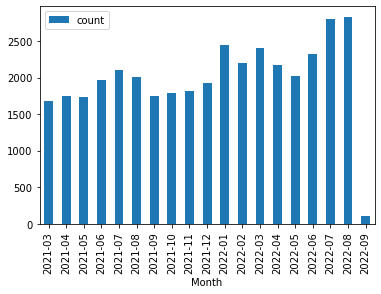

In [16]:
plot_dates(df, 'Published Date (GMT-04:00) New York')

### 1. General CGM analysis
What are consumers saying about CGMs? 

In [17]:
df.head()

,Post ID,Sound Bite Text,Title,Source Type,Post Type,Is Paid,Domain,Sentiment,Published Date (GMT-04:00) New York,Author Name,Author Reddit Karma,Followers/Daily Unique Visitors/Subscribers,Positive Objects,Negative Objects,Richness,Total Engagements,Post Comments,Post Likes,Reddit Score,Rating,Source Name,Month
0,BRDRDT2-t1_imq98sr,"My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.",Have you been denied a second/third pump? Feeling like I messed up.,Forums,Replies and Comments,No,reddit.com,Neutrals,2022-09-01 19:41:36,itsgucciflipflopsbro,4472,42768.0,number,NaN,0,NaN,NaN,NaN,0,NaN,r/diabetes_t1,2022-09
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.,Metformin,Forums,Replies and Comments,No,reddit.com,Positives,2022-09-01 15:53:47,Unrealgecko,5502,42760.0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,r/diabetes_t1,2022-09
2,1565738759353602048,"i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom g6 and the omnipod system (and desperately trying to upgrade to the new closed loop omnipod system!)",NaN,Twitter,Replies and Comments,No,twitter.com,Positives,2022-09-02 12:29:44,dimo,-,1912.0,"dexcom g6, omnipod system",NaN,3,NaN,NaN,NaN,-,NaN,NaN,2022-09
3,17944607459251789,"MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carrots, apples, and macadamia nuts. Mixed it together and drizzled briannas_salad Real French Vinaigrette Dressing. When my kids see people eating alone they always say they feel bad for them. I tell them they are probably enjoying themselves. Yep, we are enjoying ourselves ??\nSIMPLE SIMPLE food! Very little insulin required, especially since I’ve been outside in the heat for hours and going back out ☀️\n\n#t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes",NaN,Instagram,Original,No,instagram.com,Neutrals,2022-09-01 14:20:21,NaN,-,NaN,NaN,NaN,0,11.0,NaN,11.0,-,NaN,NaN,2022-09
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My doctor told me when I was 10 that I should never stay in a hot tub for more than 15 minutes because it can lower glucose levels to dangerous regions. I have never payed attention to that but if I am in a hot tub I keep a close eye on my CGM because it does lower my level some.,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,reddit.com,Neutrals,2022-09-01 19:35:52,rinkidinkidoo,2976,93772.0,NaN,NaN,2,NaN,NaN,NaN,0,NaN,r/diabetes,2022-09


In [18]:
# Split dataset depending on sentiment type 
postive_df = df[df['Sentiment']=='Positives']
negative_df = df[df['Sentiment']=='Negatives']
mixed_df = df[df['Sentiment']=='Mixed']
neutral_df = df[df['Sentiment']=='Neutrals']

### Tokenization

### Remove Stop words and URL

In [19]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer() 
nlp = spacy.load('en_core_web_sm')
text = df['Sound Bite Text']
# text = df[['Sound Bite Text']].to_numpy()
# text = np.asmatrix(text)

# tokenize tweets with NTLK's TweetTokenizer
cleaned_tweets = []
for tw in text:
    # create list of tokenized words excluding stop words 
    cleaned = [word for word in tknzr.tokenize(tw.lower()) if word not in nlp.Defaults.stop_words 
               and len(word) > 2]
    cleaned_tweets.append(' '.join(cleaned))
    
# remove http urls in tweets
urlfree_tweets = []
for tweet in cleaned_tweets:
    tweet = tweet.strip()
    urlfree = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", tweet)
    urlfree_tweets.append(urlfree)

In [20]:
df['clean_text'] = urlfree_tweets

In [21]:
def getCategory(tw):
    if 'dexcom' in tw.lower():
        if 'freestyle' in tw.lower() or 'libre' in tw.lower():
            return 'both'
        else:
            return 'dexcom'
    elif 'freestyle' in tw.lower() or 'libre' in tw.lower():
        return 'libre'
    else:
        return 'none'

In [22]:
# Group tweets by subject: dexcom or libre
dexcom_text = []
libre_text = []
both_text = []
none_text = []
libre_indices = []
both_indices = []
none_indices = []
dexcom_indices = []


# for text in urlfree_tweets
for index in range(len(urlfree_tweets)):
    subject = getCategory(urlfree_tweets[index].lower())
    if subject == 'dexcom':
        dexcom_indices.append(index)
        dexcom_text.append(urlfree_tweets[index])
    elif subject == 'libre':
        libre_text.append(urlfree_tweets[index])
        libre_indices.append(index)
    elif subject == 'both':
        both_text.append(urlfree_tweets[index])
        both_indices.append(index)
    else:
        none_text.append(urlfree_tweets[index])
        none_indices.append(index)

In [23]:
print("No. of irrelevant text: ",len(none_text))
print("No. of Freestyle Libre only text: ",len(libre_text))
print("No. of Dexcom only text: ",len(dexcom_text))
print("No. of mixed text: ",len(both_text))

No. of irrelevant text:  14906
No. of Freestyle Libre only text:  4190
No. of Dexcom only text:  16281
No. of mixed text:  2467


In [24]:
# filter dateframe based on category
libre_df = df.filter(items = libre_indices, axis=0)
dexcom_df = df.filter(items = dexcom_indices, axis=0)
both_df = df.filter(items = both_indices, axis=0)
irre_df = df.filter(items = none_indices, axis=0)

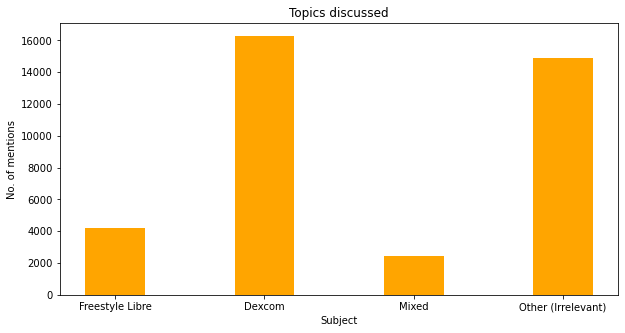

In [25]:
text_distribution = {'Freestyle Libre':len(libre_text), 'Dexcom': len(dexcom_text), 'Mixed':len(both_text),
        'Other (Irrelevant)':len(none_text)}
text_type = list(text_distribution.keys())
values = list(text_distribution.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(text_type, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Subject")
plt.ylabel("No. of mentions")
plt.title("Topics discussed")
plt.show()

### Part of Speech Tagging

In [26]:
def countPOS(clean_text):
    adj = []
    noun = []
    verb = []
    all_words = []
    for tweet in clean_text:
        for token in nlp(tweet.lower()):
            all_words.append(token.text)
            if token.pos_ == 'ADJ':
                adj.append(token.text)
            elif token.pos_ == 'NOUN':
                noun.append(token.text)
            elif token.pos_ == 'VERB':
                verb.append(token.text)
    return adj, noun, verb, all_words

In [27]:
libre_adj, libre_noun, libre_verb, libre_all = countPOS(libre_text)

In [28]:
dexcom_adj, dexcom_noun, dexcom_verb, dexcom_all = countPOS(dexcom_text)

In [29]:
both_adj, both_noun, both_verb, both_all = countPOS(both_text)

In [30]:
irre_adj, irre_noun, irre_verb, irre_all = countPOS(none_text)

In [31]:
# pass list of libre related adjectives, nouns, verbs, and all words into counter 
libre_adj_counter = Counter(libre_adj)
libre_noun_counter =  Counter(libre_noun)
libre_verb_counter = Counter(libre_verb)
libre_allwords_counter = Counter(libre_all)

# pass list of dexcom related adjectives, nouns, verbs, and all words into counter 
dexcom_adj_counter = Counter(dexcom_adj)
dexcom_noun_counter =  Counter(dexcom_noun)
dexcom_verb_counter = Counter(dexcom_verb)
dexcom_allwords_counter = Counter(dexcom_all)

# pass list of dexcom and libre related adjectives, nouns, verbs, and all words into counter 
both_adj_counter = Counter(both_adj)
both_noun_counter =  Counter(both_noun)
both_verb_counter = Counter(both_verb)
both_allwords_counter = Counter(both_all)

# pass list of un-related adjectives, nouns, verbs, and all words into counter 
irre_adj_counter = Counter(irre_adj)
irre_noun_counter =  Counter(irre_noun)
irre_verb_counter = Counter(irre_verb)
irre_allwords_counter = Counter(irre_all)


In [32]:
print("Libre-related text: \n")
print("Top 10 overall most common verbs:")
for lemma, count in libre_allwords_counter.most_common()[:10]:
    print(lemma,':', count)
    
print("\nTop 10 overall most common adjective:")
for lemma, count in libre_adj_counter.most_common()[:10]:
    print(lemma,':', count)
    
print("\nTop 10 overall most common noun:")
for lemma, count in libre_noun_counter.most_common()[:10]:
    print(lemma,':', count)
    

print("\nTop 10 overall most common verb:")
for lemma, count in libre_verb_counter.most_common()[:10]:
    print(lemma,':', count)
    


Libre-related text: 

Top 10 overall most common verbs:
libre : 5216
freestyle : 4187
# : 2325
cgm : 2003
glucose : 1845
i : 1501
blood : 1429
sensor : 1302
use : 1292
- : 1276

Top 10 overall most common adjective:
low : 538
continuous : 500
diabetic : 363
new : 353
good : 352
high : 348
able : 311
free : 303
medical : 251
different : 235

Top 10 overall most common noun:
freestyle : 3974
libre : 3312
glucose : 1699
blood : 1428
sensor : 1284
sugar : 962
day : 869
time : 813
insulin : 726
diabetes : 712

Top 10 overall most common verb:
use : 719
know : 477
got : 456
think : 369
getting : 322
going : 318
need : 316
started : 311
said : 277
want : 268


## Dexcom

In [33]:
print("Dexcom-related text: \n")
print("Top 10 overall most common words:")
for lemma, count in dexcom_allwords_counter.most_common()[:10]:
    print(lemma,':', count)
    
print("\nTop 10 overall most common adjective:")
for lemma, count in dexcom_adj_counter.most_common()[:10]:
    print(lemma,':', count)
    
print("\nTop 10 overall most common noun:")
for lemma, count in dexcom_noun_counter.most_common()[:10]:
    print(lemma,':', count)
    

print("\nTop 10 overall most common verb:")
for lemma, count in dexcom_verb_counter.most_common()[:10]:
    print(lemma,':', count)
    

Dexcom-related text: 

Top 10 overall most common words:
dexcom : 20793
i : 5945
pump : 5125
n't : 4534
# : 4118
cgm : 4078
's : 3807
like : 3756
- : 3243
use : 3220

Top 10 overall most common adjective:
low : 2021
new : 1653
good : 1495
high : 1118
medtronic : 1058
able : 949
better : 921
great : 850
omnipod : 759
little : 705

Top 10 overall most common noun:
dexcom : 9025
pump : 3975
time : 3009
insulin : 2915
sensor : 2570
years : 2346
blood : 2259
day : 1936
sugar : 1793
phone : 1686

Top 10 overall most common verb:
got : 1881
use : 1571
know : 1564
think : 1403
going : 1386
getting : 1183
dexcom : 1062
feel : 1052
having : 1006
started : 981


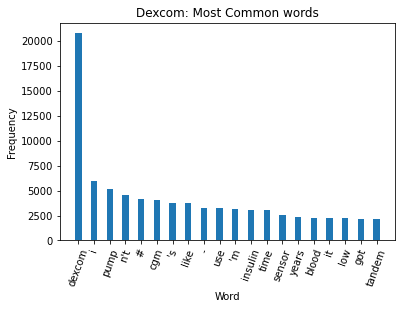

In [34]:
dexcom_most_common = dexcom_allwords_counter.most_common()[:20]

entity_label = [i[0] for i in dexcom_most_common]
frequency = [i[1] for i in dexcom_most_common]
plt.bar(entity_label, frequency,
        width = 0.4)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Most Common words')
plt.show()

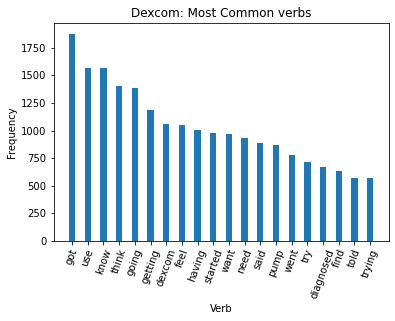

In [35]:
dexcom_most_common_verb = dexcom_verb_counter.most_common()[:20]
entity_label = [i[0] for i in dexcom_most_common_verb]
frequency = [i[1] for i in dexcom_most_common_verb]
plt.bar(entity_label, frequency,
        width = 0.4)
plt.xlabel('Verb')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Most Common verbs')
plt.show()

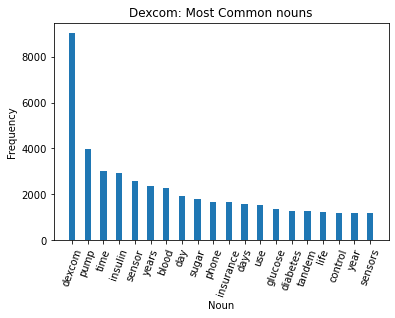

In [36]:
dexcom_most_common_noun = dexcom_noun_counter.most_common()[:20]
entity_label = [i[0] for i in dexcom_most_common_noun]
frequency = [i[1] for i in dexcom_most_common_noun]
plt.bar(entity_label, frequency,
        width = 0.4)
plt.xlabel('Noun')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Most Common nouns')
plt.show()

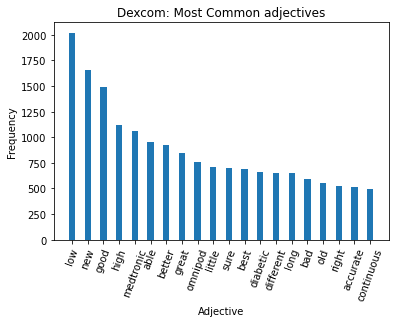

In [37]:
dexcom_most_common_adj = dexcom_adj_counter.most_common()[:20]
entity_label = [i[0] for i in dexcom_most_common_adj]
frequency = [i[1] for i in dexcom_most_common_adj]
plt.bar(entity_label, frequency,
        width = 0.4)
plt.xlabel('Adjective')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Most Common adjectives')
plt.show()

Dexcom Word cloud:


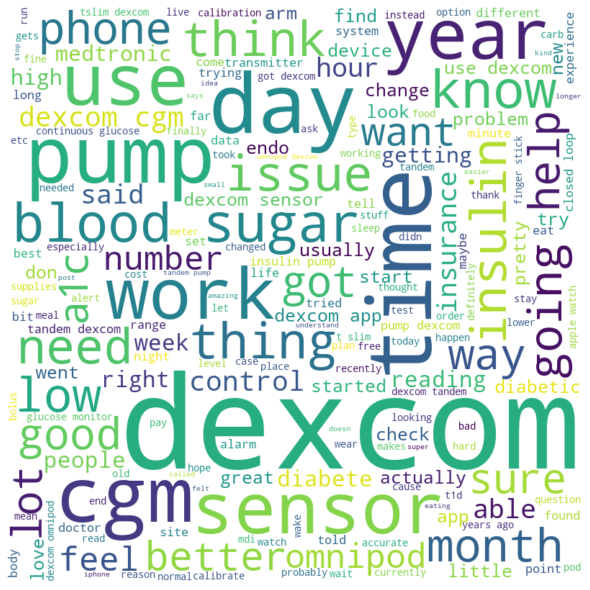

In [38]:
dexcom_common_words = ""
for val in dexcom_text:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    dexcom_common_words += " ".join(tokens)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(dexcom_common_words)
# plot the WordCloud image                      
print("Dexcom Word cloud:")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Freestyle Libre

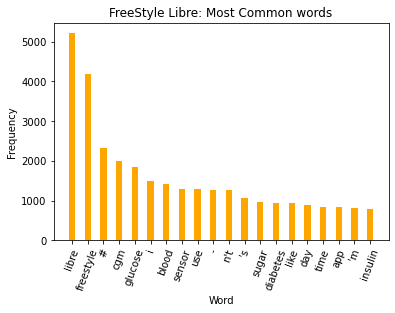

In [39]:
libre_most_common_word = libre_allwords_counter.most_common()[:20]
entity_label = [i[0] for i in libre_most_common_word]
frequency = [i[1] for i in libre_most_common_word]
plt.bar(entity_label, frequency,
        width = 0.4, color="orange")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('FreeStyle Libre: Most Common words')
plt.show()

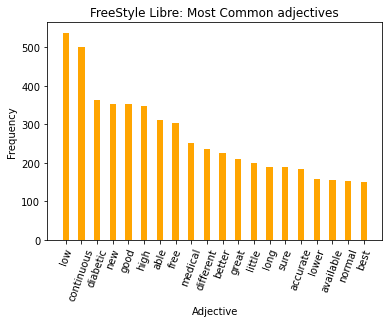

In [40]:
libre_most_common_adj = libre_adj_counter.most_common()[:20]
entity_label = [i[0] for i in libre_most_common_adj]
frequency = [i[1] for i in libre_most_common_adj]
plt.bar(entity_label, frequency,
        width = 0.4,color="orange")
plt.xlabel('Adjective')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('FreeStyle Libre: Most Common adjectives')
plt.show()

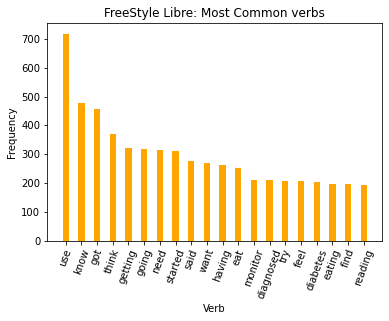

In [41]:
libre_most_common_verb = libre_verb_counter.most_common()[:20]
entity_label = [i[0] for i in libre_most_common_verb]
frequency = [i[1] for i in libre_most_common_verb]
plt.bar(entity_label, frequency,
        width = 0.4, color="orange")
plt.xlabel('Verb')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('FreeStyle Libre: Most Common verbs')
plt.show()

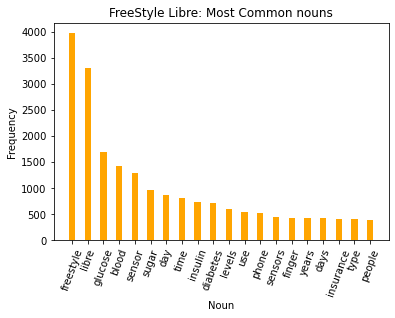

In [42]:
libre_most_common_noun = libre_noun_counter.most_common()[:20]
entity_label = [i[0] for i in libre_most_common_noun]
frequency = [i[1] for i in libre_most_common_noun]
plt.bar(entity_label, frequency,
        width = 0.4, color="orange")
plt.xlabel('Noun')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('FreeStyle Libre: Most Common nouns')
plt.show()

Freestyle Libre Word cloud:


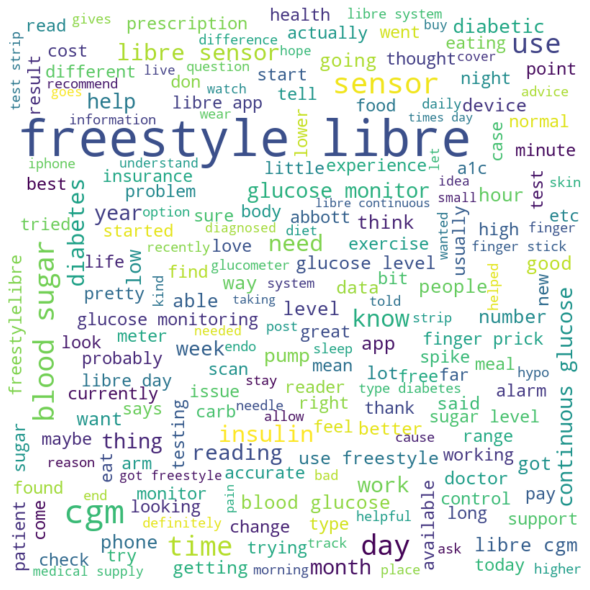

In [43]:
libre_common_words = ""
for val in libre_text:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    libre_common_words += " ".join(tokens)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(libre_common_words)
# plot the WordCloud image                      
print("Freestyle Libre Word cloud:")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Freestyle Libre and Dexcom Word cloud:


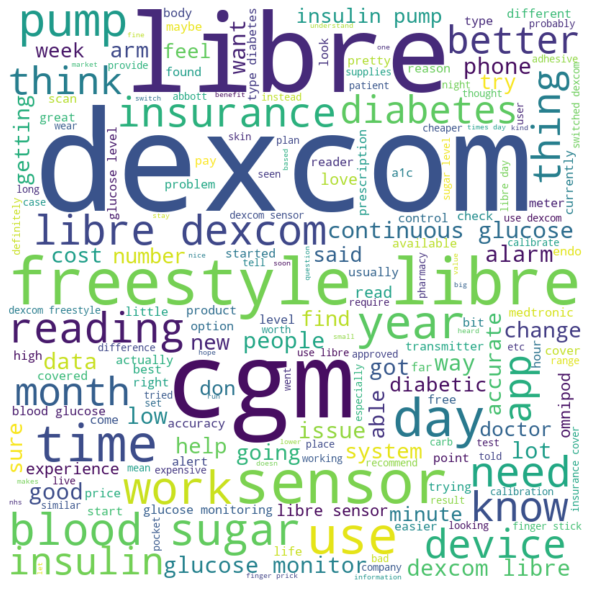

In [44]:
both_common_words = ""
for val in both_text:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    both_common_words += " ".join(tokens)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(both_common_words)
# plot the WordCloud image                      
print("Freestyle Libre and Dexcom Word cloud:")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Other Topics Word cloud:


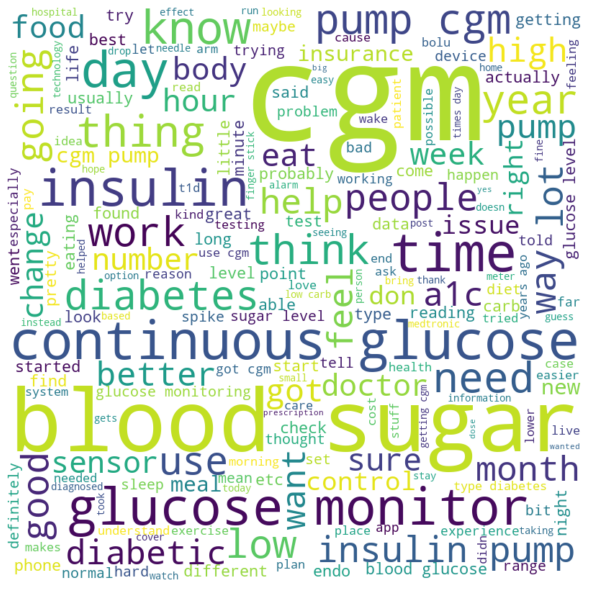

In [45]:
irrelevant_common_words = ""
for val in none_text:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    irrelevant_common_words += " ".join(tokens)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(irrelevant_common_words)
# plot the WordCloud image                      
print("Other Topics Word cloud:")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Lemmatization

In [46]:
# Reference: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
lemmatized_libre = []
for tweet in libre_text:
    doc = nlp(tweet)
    lemmatized_libre.append(" ".join([token.lemma_ for token in doc]))

libre_lemmas = []
for text in lemmatized_libre:
    libre_lemmas.append(tknzr.tokenize(text.strip()))

In [47]:
lemmatized_dexcom = []
for tweet in dexcom_text:
    doc = nlp(tweet)
    lemmatized_dexcom.append(" ".join([token.lemma_ for token in doc]))

dexcom_lemmas = []
for text in lemmatized_dexcom:
    dexcom_lemmas.append(tknzr.tokenize(text.strip()))

## LDA Topic Clustering

In [52]:
import gensim
from pprint import pprint
from gensim.models import CoherenceModel
import tqdm
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

### LDA Model for dexcom topics

In [ ]:
# Create Dictionary for Dexcom
dexcom_id2word = corpora.Dictionary(dexcom_lemmas)
# Create Corpus
dexcom_texts = dexcom_lemmas
# Term Document Frequency
dexcom_corpus = [id2word.doc2bow(text) for text in dexcom_texts]

In [213]:
lda_model = gensim.models.LdaMulticore(corpus=dexcom_corpus,
                                       id2word=dexcom_id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [214]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[dexcom_corpus]

[(0,
  '0.033*"momlife" + 0.025*"require" + 0.023*"go" + 0.018*"lunch" + '
  '0.016*"simple" + 0.015*"lunchalone" + 0.015*"enjoy" + 0.012*"thing" + '
  '0.011*"spike" + 0.010*"gym"'),
 (1,
  '0.329*"rec\'d" + 0.033*"transmitter" + 0.012*"day" + 0.011*"cartridge" + '
  '0.011*"advocate" + 0.011*"painless" + 0.010*"newish" + 0.006*"luck" + '
  '0.006*"couldn" + 0.006*"caveat"'),
 (2,
  '0.021*"upgrade" + 0.016*"insulin" + 0.012*"diagnosis" + 0.012*"usa" + '
  '0.012*"course" + 0.011*"outside" + 0.011*"pen" + 0.011*"flexible" + '
  '0.011*"not" + 0.010*"transition"'),
 (3,
  '0.034*"idea" + 0.024*"recommendation" + 0.018*"125" + 0.018*"fitmom" + '
  '0.013*"bloodsugar" + 0.013*"thing" + 0.012*"circulation" + '
  '0.012*"lunchalone" + 0.012*"care" + 0.011*"didn"'),
 (4,
  '0.054*"finger" + 0.045*"frequent" + 0.035*"terrible" + 0.026*"generation" + '
  '0.024*"bloodsugar" + 0.020*"lunchalone" + 0.017*"illness" + '
  '0.016*"paradigm" + 0.012*"data" + 0.012*"125"'),
 (5,
  '0.022*"lada" + 0.

In [215]:
#In order to get the best possible outcome, we will run hyperparameter tunning for the LDA model,given the limited computational and time resources, we will try to 
# assign reasonal ranges for all hyperparameters

# Topics range
min_topics = 3
max_topics = 15

# The range for numer of topics
topics_range = range(min_topics, max_topics)

#Create: 1.model_list to store generated models; 2.coherence_values to store coherence index associated with each model 
model_results = []

# This cross-validation may take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=12)
    # iterate through number of topics
    for k in topics_range:
        lda_model = gensim.models.LdaMulticore(corpus=dexcom_corpus,
                                               id2word=dexcom_id2word,
                                               num_topics=k, 
                                               random_state=100)        
        coherence_model_lda = CoherenceModel(model=lda_model, texts=dexcom_lemmas, dictionary=dexcom_id2word, coherence='c_v')
    
        model_results.append(coherence_model_lda.get_coherence())
        pbar.update(1)
    pbar.close()

100%|███████████████████████████████████████████| 12/12 [02:44<00:00, 13.72s/it]


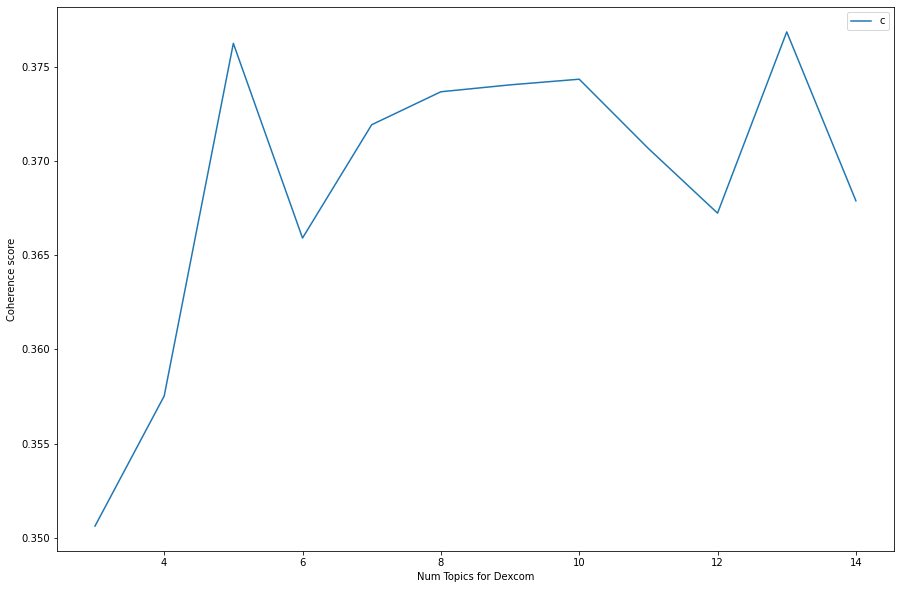

In [323]:
# By plotting the coherence scores, we can see that the locally best number of topic is 4
number_of_topic = range(3,15)

plt.plot(number_of_topic, model_results)
plt.xlabel("Num Topics for Dexcom")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

In [219]:
# Next, to get a better result from the LDA model, we will run hyperparameter tunning

# create variables to store the parameters which generate the highest coherence score
best_dexcom_coherence_score = 0

dexcom_lda_model = None;

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.2))

# Eta parameter
eta = list(np.arange(0.01, 1, 0.2))

if 1 == 1:
    pbar = tqdm.tqdm(total=25)
    # iterate through number of topics
    for a in alpha:
        # iterare through beta values
        for e in eta:
            # get the coherence score for the given parameters
#                     current_corpus = corpus_sets[i]
            model, coherence_value = compute_coherence_values(dexcom_corpus, dictionary=dexcom_id2word, a=a, e=e)
            # Save the model results if score is higher given a,e in this loop
            if coherence_value > best_dexcom_coherence_score:
                best_dexcom_coherence_score = coherence_value
                dexcom_lda_model = model
            pbar.update(1)
    pbar.close()



  0%|                                                    | 0/25 [00:18<?, ?it/s]

100%|███████████████████████████████████████████| 25/25 [05:53<00:00, 14.13s/it]


In [218]:
# Helper function (Source: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

def compute_coherence_values(corpus, dictionary, a, e):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           alpha=a,
                                           eta=e)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=dexcom_lemmas, dictionary=dexcom_id2word, coherence='c_v')
    
    return lda_model, coherence_model_lda.get_coherence()


In [220]:
print("The locally optimal parameters are:")
print("Alpha: ", dexcom_lda_model.alpha[0])
print("Eta: ", dexcom_lda_model.eta[0])
print("Coherence Score ", best_coherence_score)

The locally optimal parameters are:
Alpha:  0.81
Eta:  0.81
Coherence Score  0.4798865213031949


### LDA Model for libre topics

In [223]:
# Create Dictionary for Dexcom
libre_id2word = corpora.Dictionary(libre_lemmas)
# Create Corpus
texts = libre_lemmas
# Term Document Frequency
libre_corpus = [id2word.doc2bow(text) for text in texts]

In [224]:
#In order to get the best possible outcome, we will run hyperparameter tunning for the LDA model,given the limited computational and time resources, we will try to 
# assign reasonal ranges for all hyperparameters

# Topics range
min_topics = 3
max_topics = 15

# The range for numer of topics
topics_range = range(min_topics, max_topics)

#Create: 1.model_list to store generated models; 2.coherence_values to store coherence index associated with each model 
model_results = []

# This cross-validation may take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=12)
    # iterate through number of topics
    for k in topics_range:
        lda_model = gensim.models.LdaMulticore(corpus=libre_corpus,
                                               id2word=libre_id2word,
                                               num_topics=k, 
                                               random_state=100)        
        coherence_model_lda = CoherenceModel(model=lda_model, texts=libre_lemmas, dictionary=libre_id2word, coherence='c_v')
        model_results.append(coherence_model_lda.get_coherence())
        pbar.update(1)
    pbar.close()

100%|███████████████████████████████████████████| 12/12 [02:47<00:00, 14.00s/it]


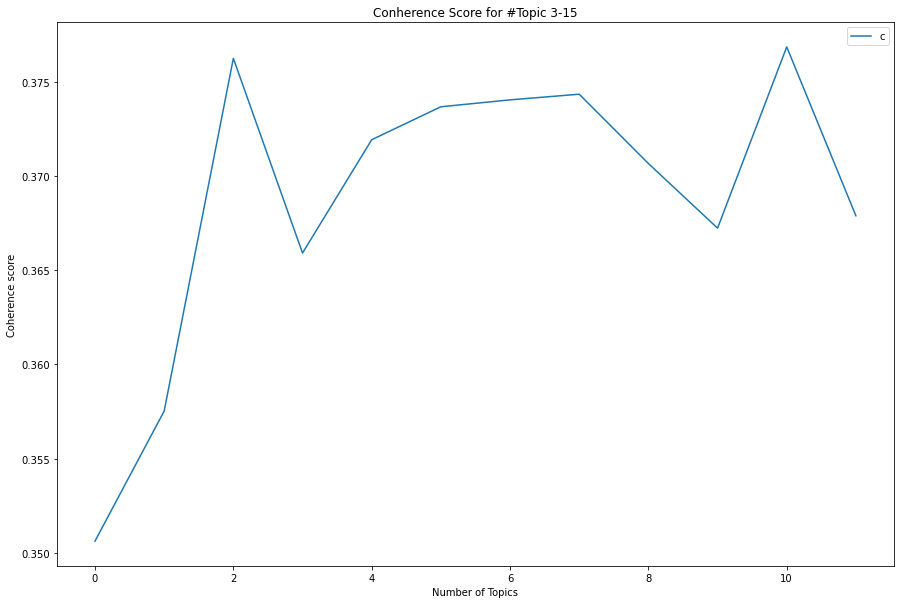

In [394]:
# By plotting the coherence scores, we can see that the locally best number of topic is 4
number_of_topic = range(12)
plt.plot(number_of_topic, model_results)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Conherence Score for #Topic 3-15")
plt.legend(("coherence_values"), loc='best')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

In [235]:
# Next, to get a better result from the LDA model, we will run hyperparameter tunning

# create variables to store the parameters which generate the highest coherence score
libre_best_coherence_score = 0
libre_lda_model = None;


# We will use the same parameters list for Alpha ane Eta
if 1 == 1:
    pbar = tqdm.tqdm(total=25)
    # iterate through number of topics
    for a in alpha:
        # iterare through beta values
        for e in eta:
            # get the coherence score for the given parameters
#                     current_corpus = corpus_sets[i]
            model, coherence_value = compute_coherence_values2(libre_corpus, dictionary=libre_id2word, a=a, e=e)
            # Save the model results if score is higher given a,e in this loop
            if coherence_value > libre_best_coherence_score:
                libre_best_coherence_score = coherence_value
                libre_lda_model = model
            pbar.update(1)
    pbar.close()



100%|███████████████████████████████████████████| 25/25 [05:47<00:00, 13.88s/it]


In [ ]:
# Helper function (Source: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
def compute_coherence_values2(corpus, dictionary, a, e):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           alpha=a,
                                           eta=e)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=libre_lemmas, dictionary=libre_id2word, coherence='c_v')
    
    return lda_model, coherence_model_lda.get_coherence()

In [236]:
print("The locally optimal parameters are:")
print("Alpha: ", libre_lda_model.alpha[0])
print("Eta: ", libre_lda_model.eta[0])
print("Coherence Score ", libre_best_coherence_score)

The locally optimal parameters are:
Alpha:  0.01
Eta:  0.01
Coherence Score  0.31019832449087803


## Graph

In [231]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [248]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared_libre = gensimvis.prepare(libre_lda_model, libre_corpus, libre_id2word)
LDAvis_prepared_libre

/Users/v/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/v/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/v/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/v/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= Loose

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.015111 -0.000361       1        1  33.165594
0      0.018605 -0.029255       2        1  32.696389
1      0.019951  0.029058       3        1  18.554238
2     -0.053667  0.000558       4        1  15.583779, topic_info=                              Term         Freq        Total Category  \
1165                             #  1994.000000  1994.000000  Default   
14                       freestyle  4138.000000  4138.000000  Default   
19                           libre  5276.000000  5276.000000  Default   
625                            use  1329.000000  1329.000000  Default   
29                          sensor  1737.000000  1737.000000  Default   
63                             day  1305.000000  1305.000000  Default   
1                                I  1543.000000  1543.000000  Default   
0                                '   939.000000   939.000000  Default   
21                             not  1374.000000  1374.000000  Default   
32                              ve   561.000000   561.000000  Default   
4                              app   869.000000   869.000000  Default   
649                           work   785.000000   785.000000  Default   
1247                         phone   547.000000   547.000000  Default   
981                            arm   407.000000   407.000000  Default   
6                               be  2068.000000  2068.000000  Default   
682                           knee   259.000000   259.000000  Default   
87                            need   624.000000   624.000000  Default   
952                      insurance   418.000000   418.000000  Default   
1683                        reader   300.000000   300.000000  Default   
739                          brace   336.000000   336.000000  Default   
300                         device   395.000000   395.000000  Default   
9                               do   773.000000   773.000000  Default   
642                           week   466.000000   466.000000  Default   
255                            cgm  2065.000000  2065.000000  Default   
522                           read   424.000000   424.000000  Default   
414                           like   958.000000   958.000000  Default   
33                            year   703.000000   703.000000  Default   
25                    prescription   187.000000   187.000000  Default   
302                       diabetic   523.000000   523.000000  Default   
359                           free   316.000000   316.000000  Default   
7583                     elaborate     3.310051     3.338454   Topic1   
6580                    obtainable     2.210851     2.239253   Topic1   
7932                      flatline     2.210126     2.238529   Topic1   
2155                          forr     2.210098     2.238500   Topic1   
3823                           2.1     2.209922     2.238325   Topic1   
5658                   glimiperide     2.209850     2.238252   Topic1   
6590                       ukraine     2.209782     2.238184   Topic1   
4131                          uber     2.209756     2.238158   Topic1   
6891                       village     2.209729     2.238131   Topic1   
7770                           vit     2.209691     2.238094   Topic1   
3499                         pende     2.209457     2.237860   Topic1   
4937                           isi     2.209436     2.237838   Topic1   
4540                       haydock     2.209410     2.237813   Topic1   
6564                  sulfonylurea     2.209341     2.237744   Topic1   
5656                          10.9     2.209326     2.237728   Topic1   
4541                    youcandoit     2.209003     2.237405   Topic1   
3589                   marketplace     2.208746     2.237148   Topic1   
6030               @thehangrywoman     2.208683     2.237085   Topic1   
5728                           agp     2.208615     2.23

In [244]:
dexcom_model_topics = dexcom_lda_model.show_topics(formatted=False)
# pprint(dexcom_lda_model.print_topics(num_words=10))
dexcom_model_topics

[(0,
  [('great', 0.014506726),
   ('125', 0.013817112),
   ('actual', 0.012217582),
   ('thing', 0.009943946),
   ('momlife', 0.009056712),
   ('recommendation', 0.009052138),
   ('enjoy', 0.007980893),
   ('superior', 0.007774057),
   ('simple', 0.0077723865),
   ('mild', 0.007709139)]),
 (1,
  [('great', 0.018517027),
   ("rec'd", 0.015972212),
   ('actual', 0.012069233),
   ('superior', 0.011802312),
   ('125', 0.010173007),
   ('a1c', 0.007918831),
   ('pen', 0.007901868),
   ('enjoy', 0.007857046),
   ('simple', 0.0076224417),
   ('thing', 0.0075222002)]),
 (2,
  [('great', 0.012810442),
   ('125', 0.010679391),
   ('actual', 0.009459818),
   ('simple', 0.009270628),
   ('superior', 0.00864547),
   ('recommendation', 0.008517014),
   ('pen', 0.008213559),
   ('thing', 0.008010424),
   ('easyrecipe', 0.007867271),
   ('desperately', 0.0074586715)]),
 (3,
  [('actual', 0.013516354),
   ('great', 0.012508968),
   ('superior', 0.010620301),
   ('125', 0.010556351),
   ('desperately',

In [246]:
libre_model_topics = libre_lda_model.show_topics(formatted=False)
# pprint(libre_lda_model.print_topics(num_words=10))
libre_model_topics

[(0,
  [('libre', 0.036476005),
   ('freestyle', 0.0260284),
   ('cgm', 0.016430633),
   ('glucose', 0.015782086),
   ('blood', 0.012697939),
   ('sugar', 0.010600017),
   ('-', 0.010378833),
   ('be', 0.009772543),
   ('use', 0.009685695),
   ('sensor', 0.008983474)]),
 (1,
  [('libre', 0.03662375),
   ('freestyle', 0.024881862),
   ('I', 0.012588492),
   ('sensor', 0.011884549),
   ('cgm', 0.011730052),
   ('not', 0.009939121),
   ('day', 0.009603082),
   ('blood', 0.009566326),
   ('be', 0.009480242),
   ('glucose', 0.008724695)]),
 (2,
  [('#', 0.049304895),
   ('freestyle', 0.030025858),
   ('libre', 0.026578628),
   ('sensor', 0.012874926),
   ('use', 0.012608804),
   ('cgm', 0.010758992),
   ('day', 0.009290255),
   ('not', 0.008303565),
   ('app', 0.007909164),
   ('be', 0.006355329)]),
 (3,
  [('libre', 0.030476483),
   ('freestyle', 0.024291005),
   ('be', 0.021044452),
   ('I', 0.0130656315),
   ('glucose', 0.012315229),
   ('sensor', 0.01118293),
   ('cgm', 0.011099426),
  

In [ ]:
# Simply looking at the top relatent words doesn't really provide useful information on people believe

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [55]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
lemmatized_data = []
for tweet in urlfree_tweets:
    doc = nlp(tweet)
    lemmatized_data.append(" ".join([token.lemma_ for token in doc]))

data_lemmas = []
for text in lemmatized_data:
    data_lemmas.append(tknzr.tokenize(text.strip()))

In [56]:
len(data_lemmas)

37844

# ENTIRE DATASET

In [58]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmas)
# Create Corpus
corpus = [id2word.doc2bow(text) for text in data_lemmas]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


In [59]:
#In order to get the best possible outcome, we will run hyperparameter tunning for the LDA model,given the limited computational and time resources, we will try to 
# assign reasonal ranges for all hyperparameters

# Topics range
min_topics = 3
max_topics = 15

# The range for numer of topics
topics_range = range(min_topics, max_topics)

#Create: 1.model_list to store generated models; 2.coherence_values to store coherence index associated with each model 
model_results = []

# This cross-validation may take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=12)
    # iterate through number of topics
    for k in topics_range:
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=k, 
                                               random_state=100)        
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmas, dictionary=id2word, coherence='c_v')
        model_results.append(coherence_model_lda.get_coherence())
        pbar.update(1)
    pbar.close()

100%|███████████████████████████████████████████| 12/12 [03:48<00:00, 19.05s/it]


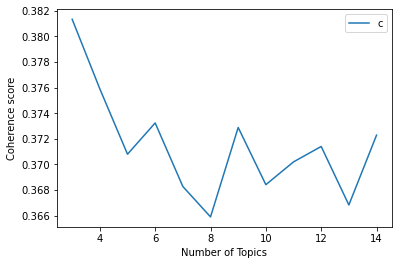

In [60]:
# By plotting the coherence scores, we can see that the locally best number of topic is 4
number_of_topic = range(3,15)
plt.plot(number_of_topic, model_results)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

In [284]:
# Next, to get a better result from the LDA model, we will run hyperparameter tunning

# create variables to store the parameters which generate the highest coherence score
best_coherence_score = 0
final_lda_model = None;

#Alpha parameter
alpha = list(np.arange(0.01, 1, 0.2))

# Eta parameter
eta = list(np.arange(0.01, 1, 0.2))

# We will use the same parameters list for Alpha ane Eta
if 1 == 1:
    pbar = tqdm.tqdm(total=25)
    # iterate through number of topics
    for a in alpha:
        # iterare through beta values
        for e in eta:
            # get the coherence score for the given parameters
#                     current_corpus = corpus_sets[i]
            model, coherence_value = compute_coherence_values3(corpus, dictionary=id2word, a=a, e=e)
            # Save the model results if score is higher given a,e in this loop
            if coherence_value > best_coherence_score:
                best_coherence_score = coherence_value
                final_lda_model = model
            pbar.update(1)
    pbar.close()


100%|█████████████████████████████████████████████| 25/25 [05:41<00:00, 13.68s/it]


In [285]:
# Helper function (Source: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
def compute_coherence_values3(corpus, dictionary, a, e):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           alpha=a,
                                           eta=e)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmas, dictionary=id2word, coherence='c_v')
    
    return lda_model, coherence_model_lda.get_coherence()

In [288]:
print("The locally optimal parameters are:")
print("# of Topic: 4")
print("Alpha: ", final_lda_model.alpha[0])
print("Eta: ", final_lda_model.eta[0])
print("Coherence Score ", best_coherence_score)

The locally optimal parameters are:
# of Topic: 4
Alpha:  0.01
Eta:  0.21
Coherence Score  0.3619999323786441


In [64]:
final_lda_model= gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=None,
                                           alpha=0.01,
                                           eta=0.21)

In [65]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(final_lda_model, corpus, id2word)
LDAvis_prepared

/Users/v/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/v/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/v/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/v/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= Loose

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.017932 -0.004705       1        1  31.975904
2     -0.016950  0.003133       2        1  29.902847
1      0.018858 -0.019920       3        1  19.824484
0      0.016024  0.021492       4        1  18.296765, topic_info=                       Term          Freq         Total Category  logprob  \
45                        #   9031.000000   9031.000000  Default  30.0000   
26                       be  16762.000000  16762.000000  Default  29.0000   
3                    dexcom  24518.000000  24518.000000  Default  28.0000   
25                        I  13127.000000  13127.000000  Default  27.0000   
90                     pump  12323.000000  12323.000000  Default  26.0000   
10                      not  12011.000000  12011.000000  Default  25.0000   
201                      it   4938.000000   4938.000000  Default  24.0000   
18                  insulin   9828.000000   9828.000000  Default  23.0000   
255                  sensor   7980.000000   7980.000000  Default  22.0000   
36                      new   3501.000000   3501.000000  Default  21.0000   
113                     low   8450.000000   8450.000000  Default  20.0000   
208                    year   7715.000000   7715.000000  Default  19.0000   
1118              medtronic   2682.000000   2682.000000  Default  18.0000   
44                      use   7876.000000   7876.000000  Default  17.0000   
121                   sugar   9194.000000   9194.000000  Default  16.0000   
209                       -   9532.000000   9532.000000  Default  15.0000   
380                   phone   3502.000000   3502.000000  Default  14.0000   
180                   issue   2920.000000   2920.000000  Default  13.0000   
4                        do   6786.000000   6786.000000  Default  12.0000   
181                   libre   8693.000000   8693.000000  Default  11.0000   
627                     can   1314.000000   1314.000000  Default  10.0000   
112                    like   9326.000000   9326.000000  Default   9.0000   
228                    slim   1145.000000   1145.000000  Default   8.0000   
650                   would   1788.000000   1788.000000  Default   7.0000   
35                     loop   1337.000000   1337.000000  Default   6.0000   
354             transmitter   1607.000000   1607.000000  Default   5.0000   
204                  supply   2363.000000   2363.000000  Default   4.0000   
526                   alarm   1875.000000   1875.000000  Default   3.0000   
347                   watch   2008.000000   2008.000000  Default   2.0000   
128                diabetic   3602.000000   3602.000000  Default   1.0000   
29176                ahcccs     14.003895     14.716524   Topic1 -10.2601   
12551               loopkit     11.069726     11.682319   Topic1 -10.4952   
17127               cashier      7.014544      7.627137   Topic1 -10.9514   
17593            duloxetine     19.441825     21.193953   Topic1  -9.9320   
22941                nugget     10.030235     11.097267   Topic1 -10.5938   
20842              porridge      7.186230      7.971051   Topic1 -10.9272   
14765                  fart      5.875296      6.546492   Topic1 -11.1286   
23579                 takin      5.345145      5.957738   Topic1 -11.2232   
23175             insinuate      5.342295      5.954888   Topic1 -11.2237   
9787                  lmfao      6.841729      7.637477   Topic1 -10.9764   
29227              coloured      4.844909      5.457502   Topic1 -11.3215   
29108                  7706      4.844382      5.456975   Topic1 -11.3216   
28929           insinuation      4.844183      5.456776   Topic1 -11.3216   
28728               perplex      4.843402      5.455995   Topic1 -11.3218   
28712                protos      4.843261      5.455853   Topic1 -11.3218   
28736                   359      4.843039      5.455631   Topic1 -11.3218   
28905         

In [66]:
sent_topics_df = pd.DataFrame()
for i, row in enumerate(final_lda_model[corpus]):
    row = sorted(row, key = lambda x: (x[1]), reverse = True)
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:
            wp = final_lda_model.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
        else:
            break
sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords']
text = df['Sound Bite Text']
contents = pd.Series(text)
sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

In [67]:
sent_topics_df.head(10)

,Topic,Perc_Contribution,Topic_Keywords,Sound Bite Text
0,3.0,0.9980,"cgm, dexcom, be, not, blood, time, day, I, glucose, -","My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it."
1,1.0,0.9970,"dexcom, pump, #, cgm, insulin, -, low, sensor, use, libre",I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.
2,3.0,0.3677,"cgm, dexcom, be, not, blood, time, day, I, glucose, -","i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom g6 and the omnipod system (and desperately trying to upgrade to the new closed loop omnipod system!)"
3,0.0,0.9997,"be, #, dexcom, I, not, cgm, pump, like, year, it","MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carrots, apples, and macadamia nuts. Mixed it together and drizzled briannas_salad Real French Vinaigrette Dressing. When my kids see people eating alone they always say they feel bad for them. I tell them they are probably enjoying themselves. Yep, we are enjoying ourselves ??\nSIMPLE SIMPLE food! Very little insulin required, especially since I’ve been outside in the heat for hours and going back out ☀️\n\n#t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes"
4,2.0,0.9990,"cgm, be, dexcom, sugar, I, not, blood, pump, like, libre",This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My doctor told me when I was 10 that I should never stay in a hot tub for more than 15 minutes because it can lower glucose levels to dangerous regions. I have never payed attention to that but if I am in a hot tub I keep a close eye on my CGM because it does lower my level some.
5,0.0,0.6051,"be, #, dexcom, I, not, cgm, pump, like, year, it",I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1warrior #diabetics #fitness #fitnessinfluencer #diabeticsofinstagram #t1dlookslikeme #diabadass #diabeticswholift #fitdiabetic #fitnessgirl
6,2.0,0.7779,"cgm, be, dexcom, sugar, I, not, blood, pump, like, libre","I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, needles to pens then a pump and eventually a pump that is closed loop controlled by a continuous blood glucose meter (CGM). Each shift in treatment improved convenience considerably especially the closed loop control system I use now. A pill would be a step backwards since it would be more like the pen which is a manual process. I can see this being slightly more useful for once a day long lasting insulins but this isn’t going to replace pump therapy since it is a manual method and can’t be algorithmically controlled."
7,1.0,0.6766,"dexcom, pump, #, cgm, insulin, -, low, sensor, use, libre","Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the libre 2. So happy to hear it’s fairly accurate! I’ve used dexcom in the past, my only issue was I like the libre app better than dexcoms lol. So this is gonna be AWESOME! How much smaller is it? Have they approved more locations on the body for this one?"
8,2.0,0.9993,"cgm, be, dexcom, sugar, I, not, blood, pump, like, libre","It depends on what insurance I have at that time. Last year we had United healthcare and I had to pay my $6,000 deductible before they would cover anything and then just for my CGM and insulin pump supplies it was about $4,000 every 3 months. We have Blue Cross now and they pay a little more but it's hard to get the supplies in a timely manner. Just went without some supplies for 

In [377]:
len(sent_topics_df)

37844

In [380]:
grouped_text_by_topic = sent_topics_df.sort_values(['Perc_Contribution'], ascending=False)

In [426]:
test = grouped_text_by_topic[grouped_text_by_topic['Topic']==2]

In [427]:
test.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Sound Bite Text
2876,2.0,0.9998,"#, freestyle, libre, sensor, use, cgm, day, not, app, be",How many carbs do you usually eat per meal? And what pump do you suggest? I have Dexcom but I’m on MDI. Was waiting for the new Dex and omnipod to switch over I think
2723,2.0,0.9998,"#, freestyle, libre, sensor, use, cgm, day, not, app, be",I was diagnosed August 2020 (37f). Do as much research as you can. I have a continuous glucose monitor that I can scan for blood glucose readings any time. They also have some with alarms so when you go hypo you get an alert. The long term effects from he highs are scary and the short term to take care of a hypo is terrifying.
2476,2.0,0.9998,"#, freestyle, libre, sensor, use, cgm, day, not, app, be","If you could push for a CGM, I would. Even the original libre 14 day system will let you know what your numbers do, without many alarms or making it too obtrusive in your life. But it allows you to see what's happening between finger sticks since those are only a snapshot in time with no indication what happened before."
341,2.0,0.9997,"#, freestyle, libre, sensor, use, cgm, day, not, app, be","Mine reads low sometimes, and my doctor says to trust my symptoms. If I’m not having symptoms of low blood sugar, I generally don’t worry about it. I sometimes do a finger prick to check the discrepancy as well."
1657,2.0,0.9997,"#, freestyle, libre, sensor, use, cgm, day, not, app, be",Agreed. Changing the CGM every 10-20 days already seems excessive and I'm absolutely not doing that every three days just for a pump. Medical/packaging waste aside that is just wild in 2021
641,2.0,0.9997,"#, freestyle, libre, sensor, use, cgm, day, not, app, be","Also in terms of A1C - yes, I have better control. I’ve never been above 6.5 since on the pump and if it starts creeping up I know it’s time to evaluate my basal rates. That plus the CGM is hugely helpful because if I am going high, I can adjust myself quickly."
1141,2.0,0.9997,"#, freestyle, libre, sensor, use, cgm, day, not, app, be","That’s a normal response but then it comes back down quickly. It’s normal to see a slight bump. I work with a lot of clients where I’ll give them a continuous glucose monitor and we’ll track that and we’ll see. You have a crummy night of sleep and you haven’t eaten anything in 12, 16, and 18 hours and your blood sugar will still spike. That’s a common stress response and it’s understanding what that means and how to interpret it."
3144,2.0,0.9997,"#, freestyle, libre, sensor, use, cgm, day, not, app, be",is it possible your cgm value is inaccurate? I wore a freestyle libre for a month and it would often say i was at like 2.0mmol even though I actually wasn't. People have told me that happens when you sleep on it weird. Not putting it in correctly can also cause problems.
993,2.0,0.9997,"#, freestyle, libre, sensor, use, cgm, day, not, app, be","where should I go for tslim supplies? I can do cvs for dexcom, but don't know options for pumps"
353,2.0,0.9997,"#, freestyle, libre, sensor, use, cgm, day, not, app, be","> Which CGM do you use, and which insulin pump? I use the Dexcom G6 as my CGM. I use the Omnipod Eros system as my insulin pump. The Abbott Libre2 and Dexcom G6 are both covered by insurance and I prefer the G6 due to it's easier integration with xDrip+ while maintaining Dexcom Clarity (medical) information. OmniPod Eros and OmniPod Dash are both covered by insurance and I prefer the Eros. Disclaimer: I receive monetary and non-monetary compensation from Insulet, the manufacturer of the OmniPod system. > Do you still keep a glucose meter? Yes, and please do. If your feelings disagree with the CGM readings, check BG manually. > If you do, do you find that it's consistent with your CGM results? I don't check it frequently and I only do so when my feelings disagree with the CGM's readings. In these circumstances, it's usually off. > How often do you charge your insulin pump if it read

In [376]:
len(grouped_text_by_topic)

25

In [326]:
# contents.head(5)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.
1                                                                                                                                                                                                                                            